In [1]:
"""
Correlation Analysis

This notebook analyzes correlations between core clustering variables, demographic factors, 
and derived measures to understand relationships and identify potential multicollinearity 
issues before clustering.

Author: Hajar Cherrouk
"""

import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr

sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 10
#load processed data
df = pd.read_csv("../../data/processed/nhanes_metabolic_analysis_ready.csv")

print("Correlation analysis: metabolic phenotypes")
print(f"\nDataset: {df.shape[0]:,} participants × {df.shape[1]} variables")
print("\n Setup complete")

Correlation analysis: metabolic phenotypes

Dataset: 3,047 participants × 42 variables

 Setup complete


In [2]:
#select variables for correlation analysis
#refer to src/data/load.py to know what these variables are
correlation_vars = ['LBXGLU','LBXTLG','BMXWAIST', 'BMXBMI','BMXWT','BMXHT', 'RIDAGEYR' ]

#create correlation matrix
corr_data = df[correlation_vars].copy()
corr_matrix = corr_data.corr(method='pearson')

print("\n Pearson correlation matrix" )
print(corr_matrix.round(3).to_string())

# save correlation matrix
corr_matrix.round(3).to_csv('../../results/tables/correlation_matrix.csv')
print("\n Table saved ")


 Pearson correlation matrix
          LBXGLU  LBXTLG  BMXWAIST  BMXBMI  BMXWT  BMXHT  RIDAGEYR
LBXGLU     1.000   0.315     0.233   0.150  0.162  0.041     0.183
LBXTLG     0.315   1.000     0.218   0.142  0.140  0.016     0.087
BMXWAIST   0.233   0.218     1.000   0.894  0.897  0.174     0.204
BMXBMI     0.150   0.142     0.894   1.000  0.883 -0.045     0.030
BMXWT      0.162   0.140     0.897   0.883  1.000  0.417    -0.028
BMXHT      0.041   0.016     0.174  -0.045  0.417  1.000    -0.135
RIDAGEYR   0.183   0.087     0.204   0.030 -0.028 -0.135     1.000

 Table saved 


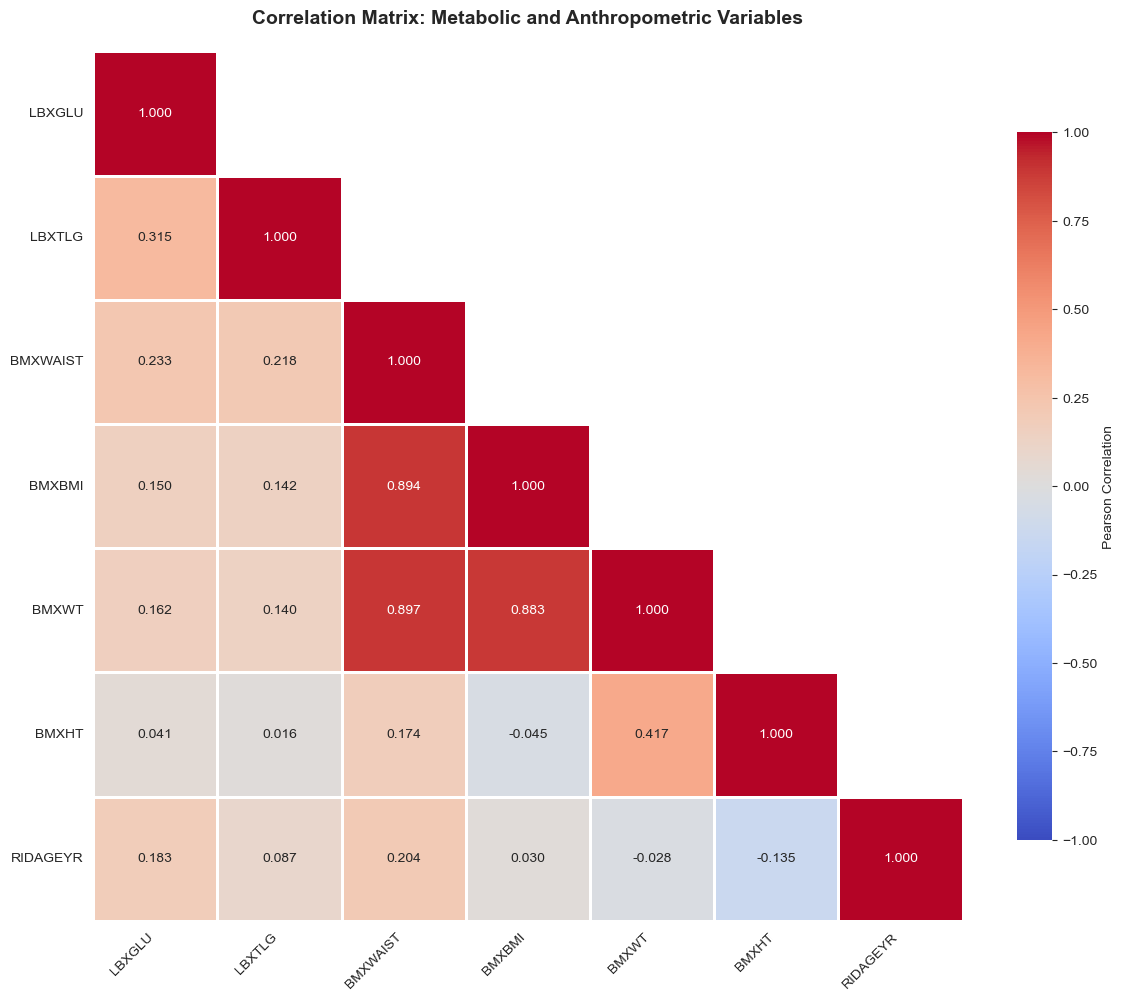

Figure saved to: results/figures/correlation_heatmap.png


In [3]:
#comprehensive correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))

#create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.3f', cmap='coolwarm',  center=0,  square=True, linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}, vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix: Metabolic and Anthropometric Variables', 
             fontsize=14, fontweight='bold', pad=20)

#rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../../results/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/correlation_heatmap.png")

In [4]:
# focus on the three core clustering variables
core_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST']
core_corr = df[core_vars].corr(method='pearson')

print("\n Core clustering variables: correlation analysis")
print("\nPearson Correlations:")
print(core_corr.round(3).to_string())

#also compute Spearman (rank based, robust to outliers)
core_corr_spearman = df[core_vars].corr(method='spearman')
print("\nSpearman Correlations:")
print(core_corr_spearman.round(3).to_string())

# statistical significance testing
print("\n Correlation significance tests (pearson)" )

for i, var1 in enumerate(core_vars):
    for var2 in core_vars[i+1:]:
        r, p = pearsonr(df[var1], df[var2])
        significance = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
        print(f"{var1:12s} vs {var2:12s}: r = {r:>6.3f}, p = {p:.4f} {significance}")

print("\nSignificance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")


 Core clustering variables: correlation analysis

Pearson Correlations:
          LBXGLU  LBXTLG  BMXWAIST
LBXGLU     1.000   0.315     0.233
LBXTLG     0.315   1.000     0.218
BMXWAIST   0.233   0.218     1.000

Spearman Correlations:
          LBXGLU  LBXTLG  BMXWAIST
LBXGLU     1.000   0.313     0.376
LBXTLG     0.313   1.000     0.364
BMXWAIST   0.376   0.364     1.000

 Correlation significance tests (pearson)
LBXGLU       vs LBXTLG      : r =  0.315, p = 0.0000 ***
LBXGLU       vs BMXWAIST    : r =  0.233, p = 0.0000 ***
LBXTLG       vs BMXWAIST    : r =  0.218, p = 0.0000 ***

Significance: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


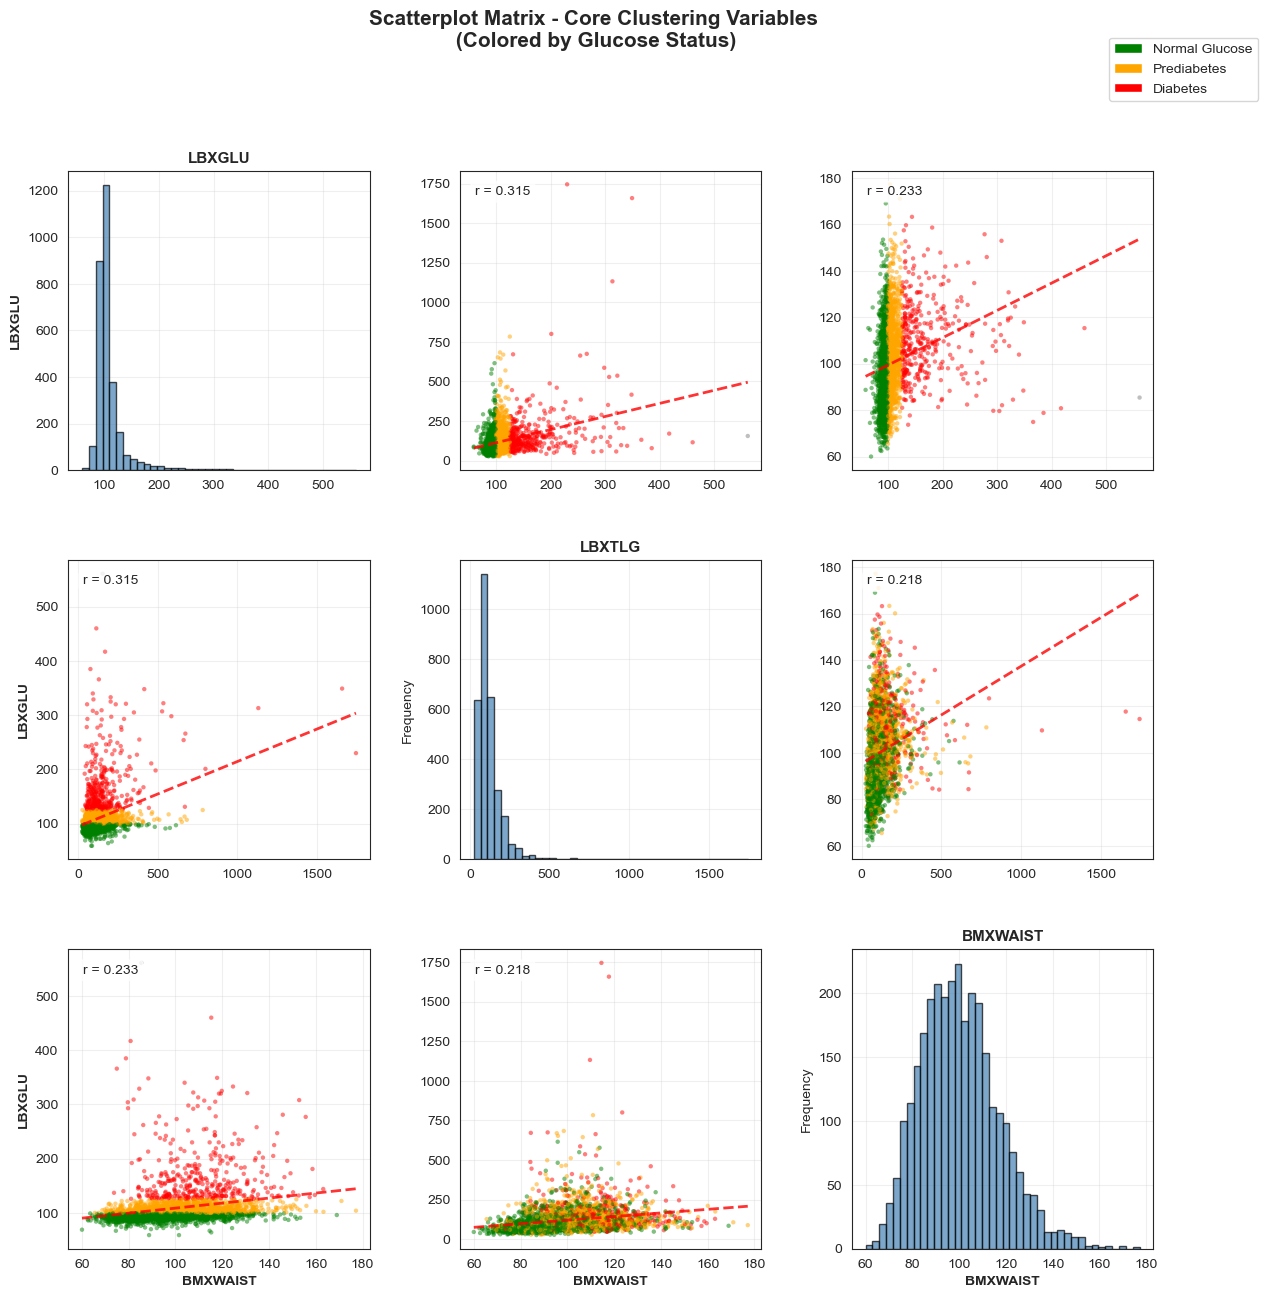

Figure saved to: results/figures/scatterplot_matrix_core_variables.png


In [6]:
#create pairplot for core clustering variables
#color by glucose category for interpretability

fig = plt.figure(figsize=(14, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# define colors for glucose categories
color_map = {'Normal': 'green', 'Prediabetes': 'orange', 'Diabetes': 'red'}
colors = df['glucose_category'].map(color_map).fillna('gray')

plot_pairs = [
    (0, 0, 'LBXGLU', 'LBXGLU', 'Glucose vs Glucose'), (0, 1, 'LBXGLU', 'LBXTLG', 'Glucose vs Triglycerides'),
    (0, 2, 'LBXGLU', 'BMXWAIST', 'Glucose vs Waist'), (1, 0, 'LBXTLG', 'LBXGLU', 'Triglycerides vs Glucose'),
    (1, 1, 'LBXTLG', 'LBXTLG', 'Triglycerides vs Triglycerides'), (1, 2, 'LBXTLG', 'BMXWAIST', 'Triglycerides vs Waist'),
    (2, 0, 'BMXWAIST', 'LBXGLU', 'Waist vs Glucose'), (2, 1, 'BMXWAIST', 'LBXTLG', 'Waist vs Triglycerides'),
    (2, 2, 'BMXWAIST', 'BMXWAIST', 'Waist vs Waist'),]

for row, col, xvar, yvar, title in plot_pairs:
    ax = fig.add_subplot(gs[row, col])
    
    if row == col:
        # diagonal: histograms
        ax.hist(df[xvar], bins=40, alpha=0.7, color='steelblue', edgecolor='black')
        ax.set_ylabel('Frequency', fontsize=10)
        ax.set_title(f'{xvar}', fontsize=11, fontweight='bold')
    else:
        # off diagonal: scatter plots
        ax.scatter(df[xvar], df[yvar], c=colors, alpha=0.5, s=10, edgecolors='none')
        
        # add regression line
        z = np.polyfit(df[xvar], df[yvar], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df[xvar].min(), df[xvar].max(), 100)
        ax.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
        
        # add correlation coefficient
        r, p_val = pearsonr(df[xvar], df[yvar])
        ax.text(0.05, 0.95, f'r = {r:.3f}', transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    if col == 0:
        ax.set_ylabel(yvar, fontsize=10, fontweight='bold')
    if row == 2:
        ax.set_xlabel(xvar, fontsize=10, fontweight='bold')
    
    ax.grid(alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Normal Glucose'),
                   Patch(facecolor='orange', label='Prediabetes'),
                   Patch(facecolor='red', label='Diabetes')]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

fig.suptitle('Scatterplot Matrix - Core Clustering Variables\n (Colored by Glucose Status)', fontsize=15, fontweight='bold', y=0.995)

plt.savefig('../../results/figures/scatterplot_matrix_core_variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/scatterplot_matrix_core_variables.png")

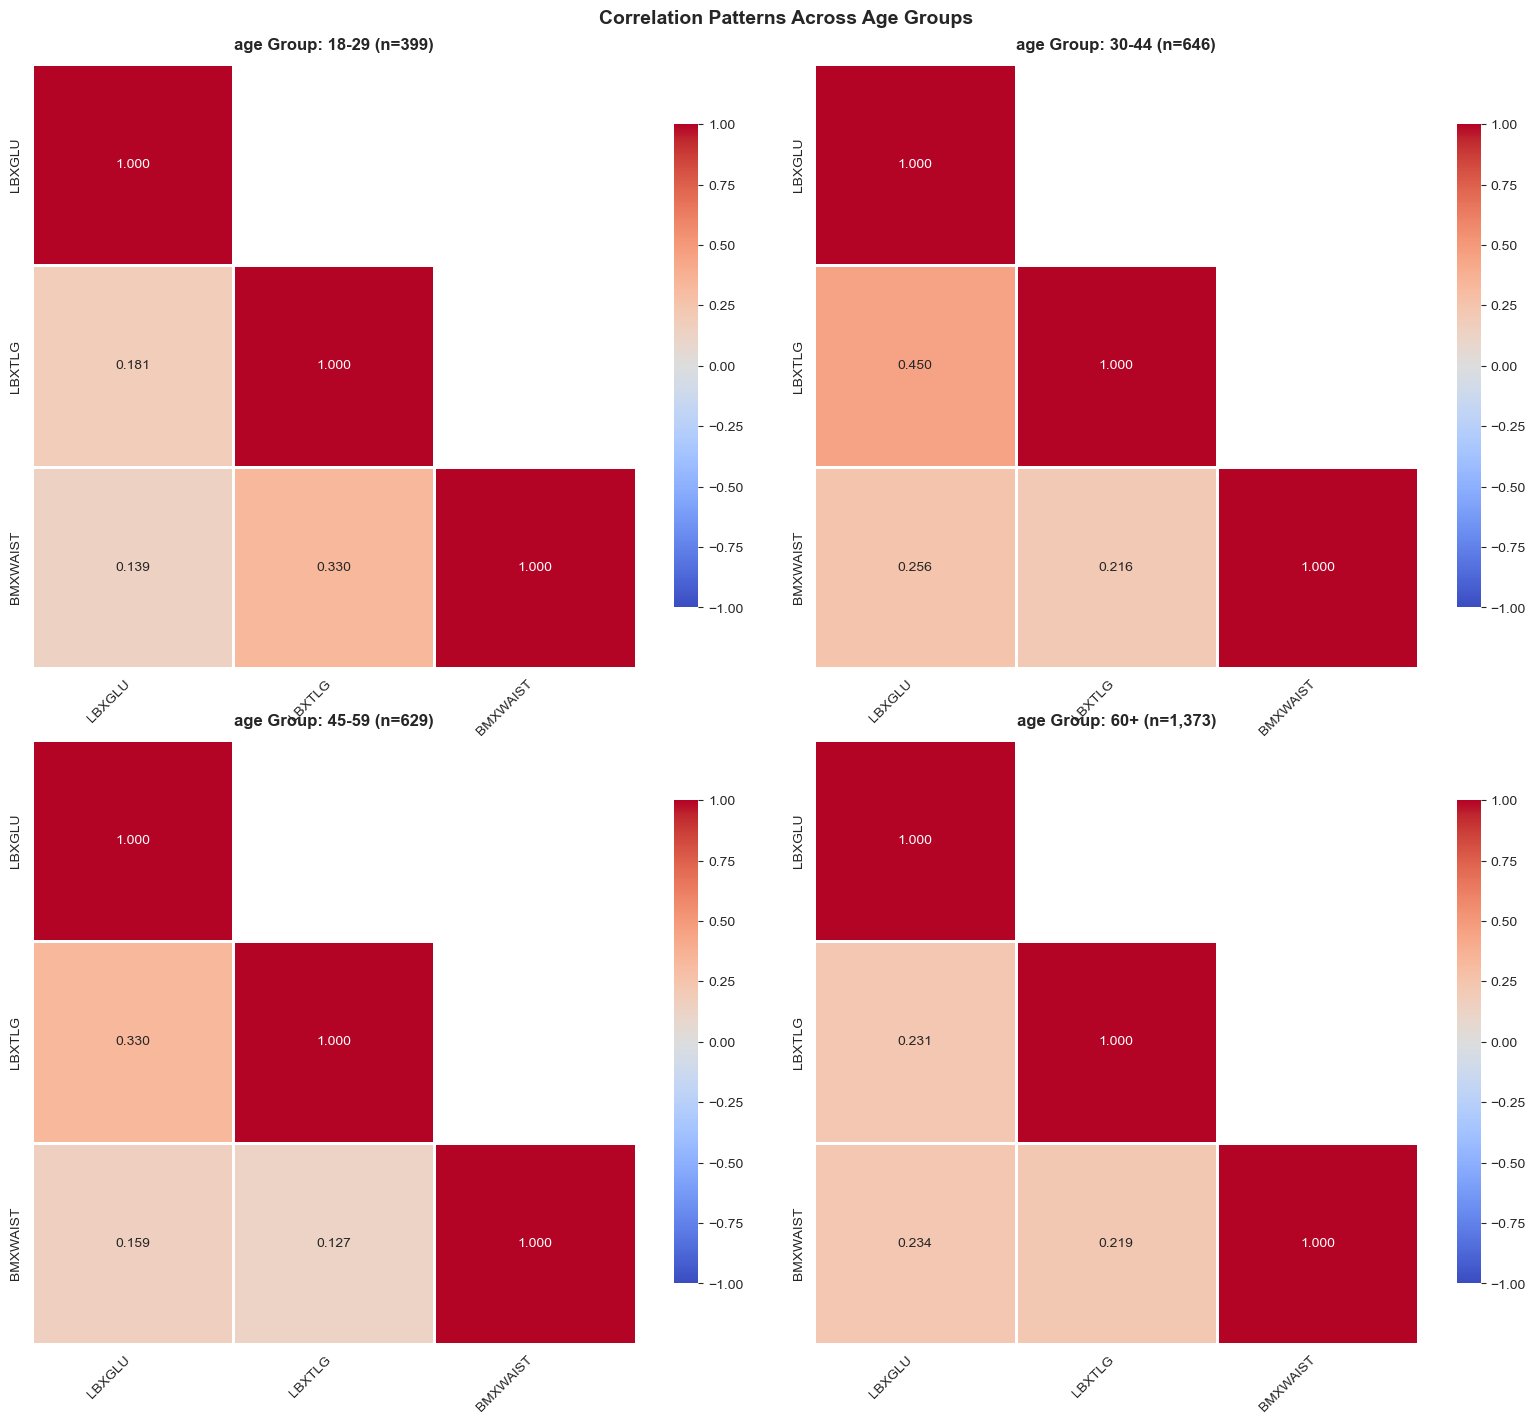

Figure saved to: results/figures/correlation_by_age_group.png


In [8]:
# stratified correlation analysis by age group
age_groups = df['age_group'].unique()
age_groups_sorted = sorted(age_groups, key=lambda x: int(x.split('-')[0].replace('+', '')))

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

# for each age group, create a correlation heatmap
for idx, age_group in enumerate(age_groups_sorted):
    ax = axes[idx]
    subset = df[df['age_group'] == age_group][core_vars]
    corr = subset.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(corr, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                vmin=-1, vmax=1,ax=ax)
    
    ax.set_title(f'age Group: {age_group} (n={len(subset):,})', 
                 fontsize=12, fontweight='bold', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Correlation Patterns Across Age Groups', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../../results/figures/correlation_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/correlation_by_age_group.png")

In [9]:
# calculate partial correlations (controlling for age and sex)
from scipy.stats import pearsonr

def partial_correlation(df, x, y, controls):
    # residualize x
    X_controls = df[controls].values
    y_x = df[x].values
    
    # basic linear regression to get residuals
    from sklearn.linear_model import LinearRegression
    model_x = LinearRegression().fit(X_controls, y_x)
    residuals_x = y_x - model_x.predict(X_controls)
    
    # residualize y
    y_y = df[y].values
    model_y = LinearRegression().fit(X_controls, y_y)
    residuals_y = y_y - model_y.predict(X_controls)
    
    # orrelation of residuals
    r, p = pearsonr(residuals_x, residuals_y)
    return r, p

print("\n Partial correlations (Controlling for Age and Sex)")
print("\nRaw vs. Partial Correlations:")

controls = ['RIDAGEYR', 'RIAGENDR']
core_pairs = [    ('LBXGLU', 'LBXTLG'), ('LBXGLU', 'BMXWAIST'), ('LBXTLG', 'BMXWAIST')]

partial_corr_results = []

for var1, var2 in core_pairs:
    # raw correlation
    r_raw, p_raw = pearsonr(df[var1], df[var2])
    
    # partial correlation
    r_partial, p_partial = partial_correlation(df, var1, var2, controls)
    
    partial_corr_results.append({
        'Pair': f'{var1} vs {var2}',
        'Raw_r': r_raw,
        'Partial_r': r_partial,
        'Difference': abs(r_raw - r_partial)
    })
    
    print(f"\n{var1} vs {var2}:")
    print(f"  Raw correlation:     r = {r_raw:.3f} (p = {p_raw:.4f})")
    print(f"  Partial correlation: r = {r_partial:.3f} (p = {p_partial:.4f})")
    print(f"  Change:              Δr = {abs(r_raw - r_partial):.3f}")

partial_corr_df = pd.DataFrame(partial_corr_results)
partial_corr_df.to_csv('../../results/tables/partial_correlations.csv', index=False)
print("\n Table saved to: results/tables/partial_correlations.csv")


 Partial correlations (Controlling for Age and Sex)

Raw vs. Partial Correlations:

LBXGLU vs LBXTLG:
  Raw correlation:     r = 0.315 (p = 0.0000)
  Partial correlation: r = 0.301 (p = 0.0000)
  Change:              Δr = 0.015

LBXGLU vs BMXWAIST:
  Raw correlation:     r = 0.233 (p = 0.0000)
  Partial correlation: r = 0.190 (p = 0.0000)
  Change:              Δr = 0.044

LBXTLG vs BMXWAIST:
  Raw correlation:     r = 0.218 (p = 0.0000)
  Partial correlation: r = 0.199 (p = 0.0000)
  Change:              Δr = 0.019

 Table saved to: results/tables/partial_correlations.csv



Performing stratified correlation analysis by age group...


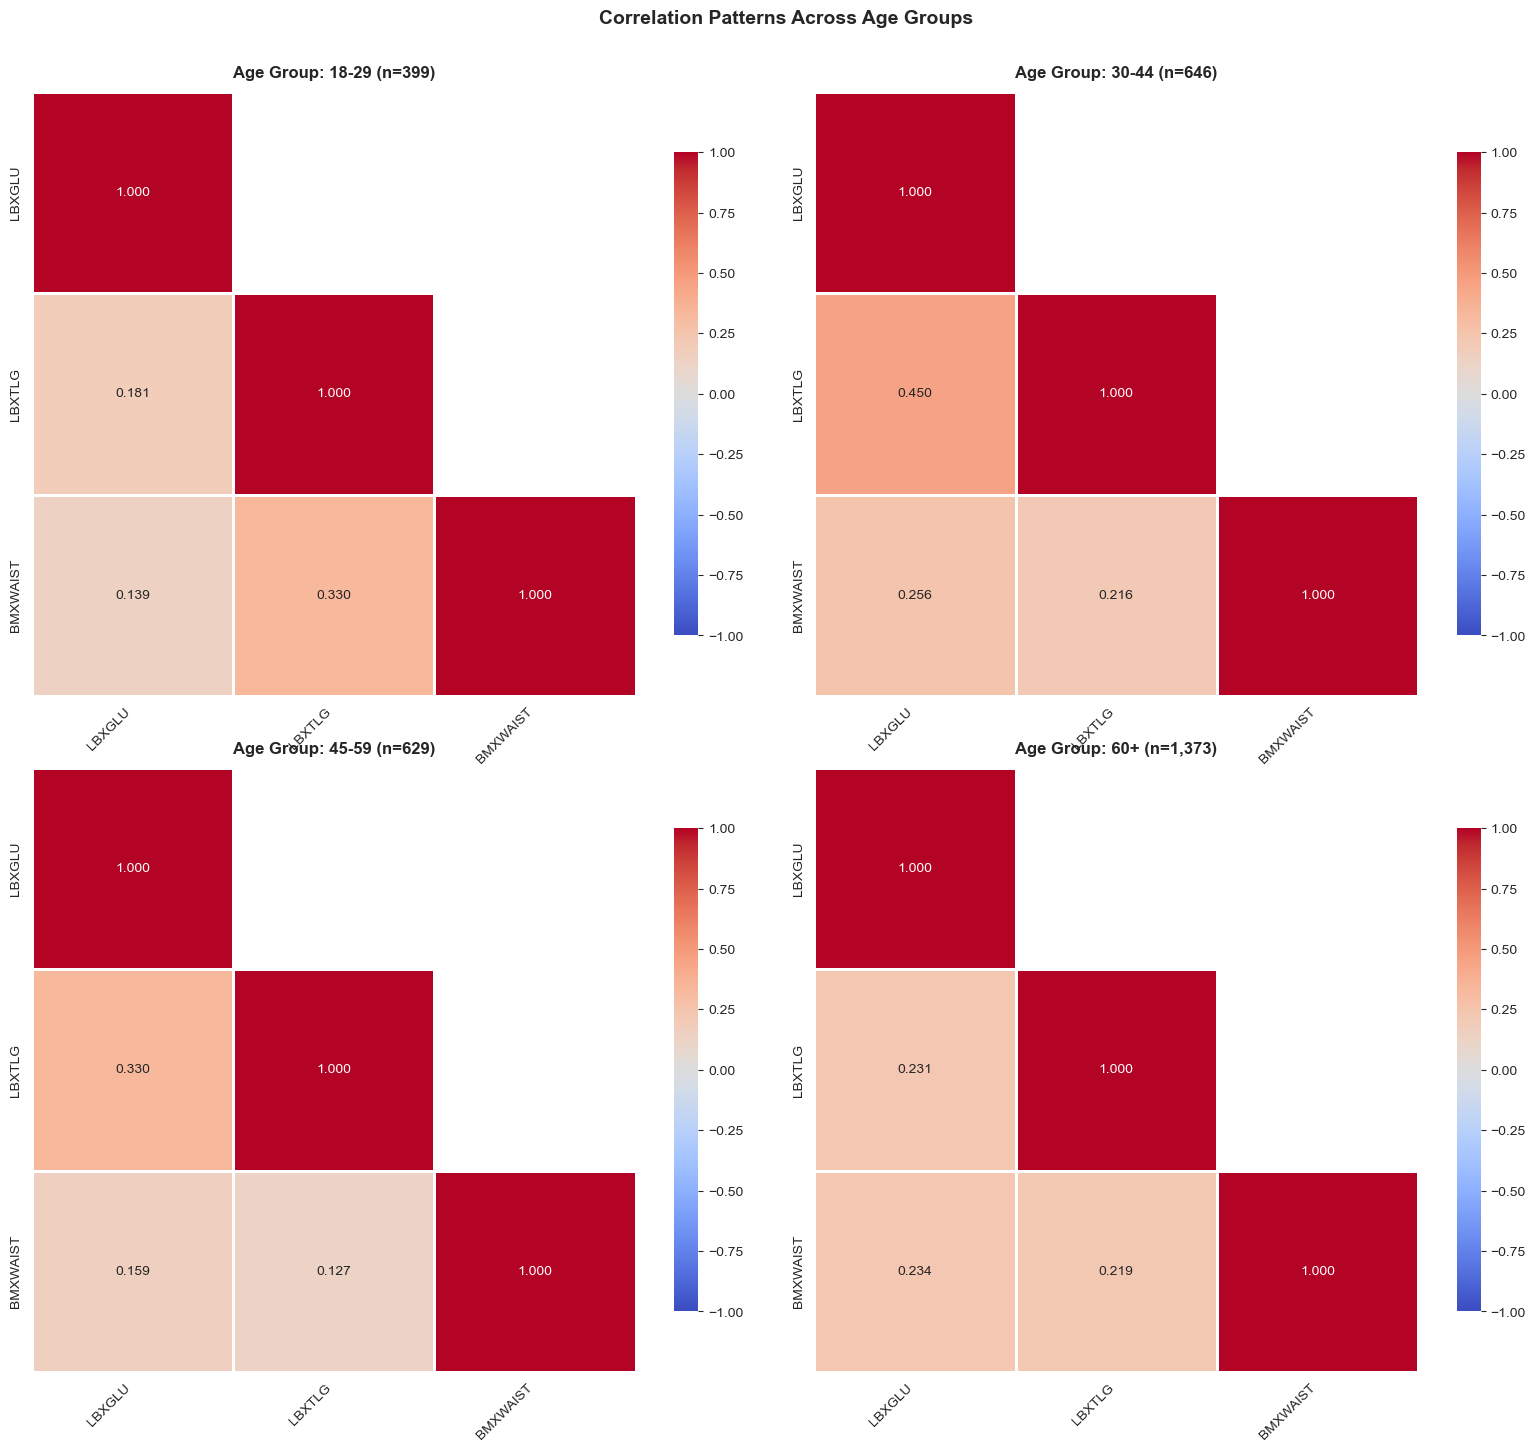

Figure saved to: results/figures/correlation_by_age_group.png

Calculating overall correlation and VIF...

KEY FINDINGS: Correlation & Multicollinearity

• Glucose ↔ Triglycerides:  r = 0.315
• Glucose ↔ Waist:          r = 0.233
• Triglycerides ↔ Waist:    r = 0.218

All correlations < 0.7 → Variables provide largely independent information.

Multicollinearity Check (VIF):
   LBXGLU      : VIF = 12.13 → Elevated!
   LBXTLG      : VIF =  3.26 → Acceptable
   BMXWAIST    : VIF = 11.60 → Elevated!

Implications for clustering:
 - Low correlations → Each variable contributes unique signal.
 - Proceed with all variables in clustering analysis.

Correlation and VIF analysis complete.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

core_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST']

print("\nPerforming stratified correlation analysis by age group...")

def parse_age_group(x):
    if isinstance(x, str):
        x = x.replace('+', '')  
        try:
            return int(x.split('-')[0])
        except ValueError:
            return np.inf  # if unparseable, push to end
    return np.inf

age_groups = df['age_group'].dropna().unique()
age_groups_sorted = sorted(age_groups, key=parse_age_group)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, age_group in enumerate(age_groups_sorted[:4]):  # limit to 4 panels for 2x2 grid 
    ax = axes[idx]
    subset = df[df['age_group'] == age_group][core_vars].dropna()

    if subset.empty:
        ax.axis('off')
        ax.set_title(f'Age Group: {age_group} (No data)', fontsize=12)
        continue

    corr = subset.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(
        corr, mask=mask, annot=True, fmt='.3f', cmap='coolwarm',
        center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
        vmin=-1, vmax=1, ax=ax
    )
    ax.set_title(f'Age Group: {age_group} (n={len(subset):,})',
                 fontsize=12, fontweight='bold', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Correlation Patterns Across Age Groups',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../../results/figures/correlation_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to: results/figures/correlation_by_age_group.png")

print("\nCalculating overall correlation and VIF...")

corr_matrix = df[core_vars].corr(method='pearson')

X = df[core_vars].dropna()
vif_df = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nKEY FINDINGS: Correlation & Multicollinearity\n")

glucose_trig_r = corr_matrix.loc['LBXGLU', 'LBXTLG']
glucose_waist_r = corr_matrix.loc['LBXGLU', 'BMXWAIST']
trig_waist_r = corr_matrix.loc['LBXTLG', 'BMXWAIST']

print(f"• Glucose ↔ Triglycerides:  r = {glucose_trig_r:.3f}")
print(f"• Glucose ↔ Waist:          r = {glucose_waist_r:.3f}")
print(f"• Triglycerides ↔ Waist:    r = {trig_waist_r:.3f}")

max_corr = max(abs(glucose_trig_r), abs(glucose_waist_r), abs(trig_waist_r))
if max_corr < 0.7:
    print("\nAll correlations < 0.7 → Variables provide largely independent information.")
else:
    print("\nSome correlations ≥ 0.7 → Consider possible multicollinearity issues.")

print("\nMulticollinearity Check (VIF):")
for _, row in vif_df.iterrows():
    status = "Acceptable" if row['VIF'] < 5 else "Elevated!"
    print(f"   {row['Variable']:12s}: VIF = {row['VIF']:>5.2f} → {status}")

print("\nImplications for clustering:")
if max_corr < 0.5:
    print(" - Low correlations → Each variable contributes unique signal.")
    print(" - Proceed with all variables in clustering analysis.")
elif max_corr < 0.7:
    print(" - Moderate correlations → Variables related but not redundant.")
    print(" - Retain all variables, but standardize before clustering.")
else:
    print(" - High correlations → Consider PCA or feature selection.")

print("\nCorrelation and VIF analysis complete.")
